<h1> Project Proposal: When does a professional tennis player reach their peak performance? </h1>
    <p> Using the dataset of the Top 500 Tennis Players' Statistics, we will explore the relationship between a player's age, duration of playing professionally, and the best rank. The dataset gives information on different tennis players all around the world, their age, their current rank, the country they’re from, which hand they use for playing, when they turned pro, their number of seasons thus far, if they’re still active players or retired, prize money, and other bits of information on the players, but for this project, we will only be using some of the data. </p>
    
[Link to Top 500 Tennis Players' Statistics](https://www.ultimatetennisstatistics.com/tournamentEvents)

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

<h2> Reading and tidying data </h2>
<p>The code below shows that our data can be read from the web.</p>

In [2]:
player_stats <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<p> Once the data is read, we attempt to tidy the data frame and select only the columns containing the necessary variables for our project: Age, Plays, Best Rank, Name, Turned Pro and Seasons. We then separate the Age and Best Rank columns as they contain two values per cell. We separated the age from the players' date of birth, and the best rank into their rank and the date of when they achieved this ranking. We chose to disregard the days and months and only used their years of birth and of their best rank. There were lots of unknown values, so we removed these from the dataset. 


<h4> Methods </h4>
Using these variables, we expect to see some sort of correlation between how many seasons a player has played since they turned pro, and when they reach their best rank. Using the plays variable, we will group the players according to whether they are left-handed or right-handed to see whether this has any significance on their performance, or  on when they reach their peak. </p>

In [17]:
player_stats_tidy <- player_stats|>
    select(Seasons, Age, Plays, "Best Rank", Name,"Turned Pro", Seasons)|>
    separate(col = "Age",
             into = c("Age", "Birthday","Birth_month", "Birth_year"),
             convert = TRUE) |>
    separate(col = "Best Rank",
             into = c("Best_Rank", 
                   "Best_rank_day", "Best_rank_month", "Best_rank_year"),
            convert = TRUE) |>
    select(-Birth_month, -Birthday, -Best_rank_day, -Best_rank_month) |>
    na.omit()
player_stats_tidy

Warning message:
“Expected 4 pieces. Additional pieces discarded in 499 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”
Warning message:
“Expected 4 pieces. Additional pieces discarded in 499 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


Seasons,Age,Birth_year,Plays,Best_Rank,Best_rank_year,Name,Turned Pro
<dbl>,<int>,<int>,<chr>,<int>,<int>,<chr>,<dbl>
14,32,1987,Right-handed,44,2013,Lukas Lacko,2005
11,27,1992,Right-handed,17,2016,Bernard Tomic,2008
5,22,1997,Right-handed,31,2020,Hubert Hurkacz,2015
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7,28,1991,Right-handed,74,2018,Mirza Basic,2008
8,26,1993,Right-handed,249,2018,Dimitar Kuzmanov,2009
10,26,1993,Right-handed,4,2017,Dominic Thiem,2011


<h2> Preliminary Data Exploration </h2>
<p>To perform some preliminary data exploration, we will obtain the oldest and youngest players to calculate the range of the players's age to be 22 years. We will also see who the top 5 best ranked players and who's played the 5 most seasons. Lastly, we'll identify how many players are right-handed or left-handed. </p>

In [19]:
# Oldest Player
oldest_player <- player_stats_tidy |>
    arrange(desc(Age)) |>
    head(1)
oldest_player

# Youngest Player
youngest_player <- player_stats_tidy |>
    arrange(Age) |>
    head(1)
youngest_player

# Age range
age_range <- (max(player_stats_tidy$Age)- min(player_stats_tidy$Age))

# Top 5 Best Ranked Players
top_5_players <- player_stats_tidy |>
    arrange(Best_Rank) |>
    head(5)
top_5_players

# Top 5 Most Seasons Played
top_5_most_seasons <- player_stats_tidy |>
    arrange(desc(Seasons)) |>
    head(5)
top_5_most_seasons

# Right-handed vs Left-handed Count
right_or_left <- player_stats_tidy |>
    group_by(Plays) |>
    summarize(n = n()) |>
    arrange(desc(n))  
right_or_left

Seasons,Age,Birth_year,Plays,Best_Rank,Best_rank_year,Name,Turned Pro
<dbl>,<int>,<int>,<chr>,<int>,<int>,<chr>,<dbl>
20,40,1979,Right-handed,14,2008,Ivo Karlovic,2000


Seasons,Age,Birth_year,Plays,Best_Rank,Best_rank_year,Name,Turned Pro
<dbl>,<int>,<int>,<chr>,<int>,<int>,<chr>,<dbl>
2,18,2001,Right-handed,78,2019,Jannik Sinner,2018


[1] 22

Seasons,Age,Birth_year,Plays,Best_Rank,Best_rank_year,Name,Turned Pro
<dbl>,<int>,<int>,<chr>,<int>,<int>,<chr>,<dbl>
19,33,1986,Left-handed,1,2008,Rafael Nadal,2001
17,32,1987,Right-handed,1,2011,Novak Djokovic,2003
15,32,1987,Right-handed,1,2016,Andy Murray,2005
22,38,1981,Right-handed,1,2004,Roger Federer,1998
14,31,1988,Right-handed,3,2018,Juan Martin Del Potro,2005


Seasons,Age,Birth_year,Plays,Best_Rank,Best_rank_year,Name,Turned Pro
<dbl>,<int>,<int>,<chr>,<int>,<int>,<chr>,<dbl>
22,38,1981,Right-handed,1,2004,Roger Federer,1998
22,38,1981,Left-handed,12,2015,Feliciano Lopez,1997
21,37,1982,Right-handed,5,2006,Tommy Robredo,1998
20,38,1982,Right-handed,37,2014,Nicolas Mahut,2000
20,40,1979,Right-handed,14,2008,Ivo Karlovic,2000


Plays,n
<chr>,<int>
Right-handed,211
Left-handed,31


<h2> Visualizing Training Data </h2>
<p> After splitting our data, we will use the training data and a scatter plot to easily visualize the relationship between the the number of seasons they’ve played and their best rank. 

We have also used color to identify the right-handed players from the left-handed players to see whether this factor had any affect on their performance.</p>

In [5]:
tennis_split <- initial_split(player_stats_tidy, prop = 0.75, strata = "Best_Rank")
tennis_training <- training(tennis_split)
tennis_training <- testing(tennis_split)

tennis_training

Seasons,Age,Birth_year,Plays,Best_Rank,Best_rank_year,Name,Turned Pro
<dbl>,<int>,<int>,<chr>,<int>,<int>,<chr>,<dbl>
3,19,2000,Right-handed,17,2019,Felix Auger Aliassime,2017
5,23,1996,Right-handed,4,2019,Daniil Medvedev,2014
16,32,1987,Right-handed,9,2019,Fabio Fognini,2004
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
16,34,1986,Right-handed,31,2010,Sergiy Stakhovsky,2003
1,22,1997,Right-handed,175,2017,Carlos Taberner,2015
7,22,1998,Right-handed,29,2019,Frances Tiafoe,2015


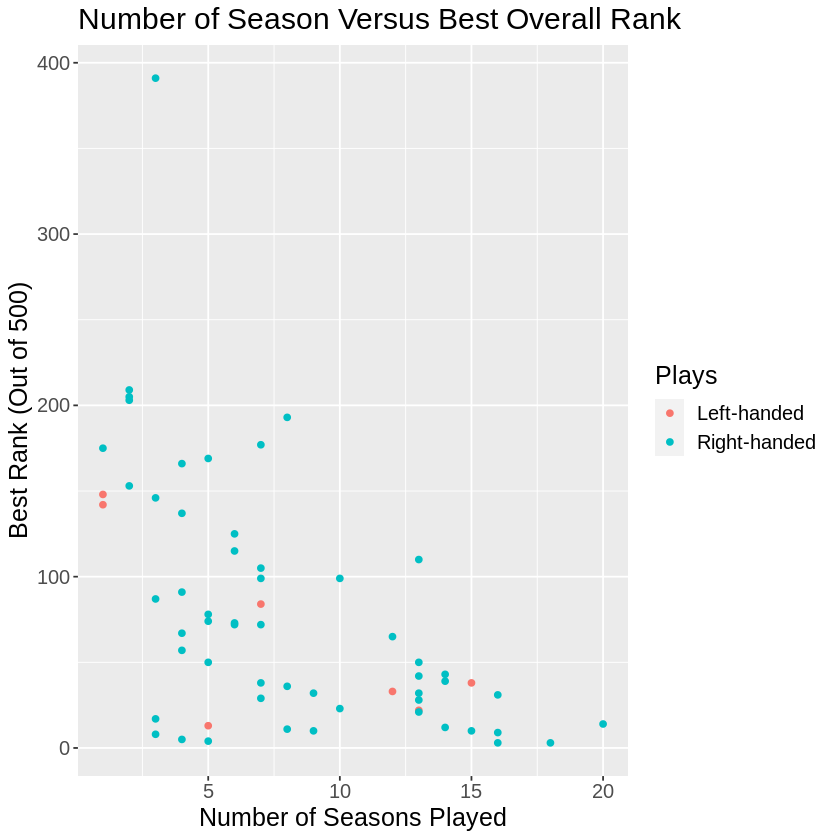

In [6]:
tennis_plot <- tennis_training|>
ggplot(aes(x = Seasons, y = Best_Rank, colour = Plays))+
geom_point()+
labs(title = "Number of Season Versus Best Overall Rank", x = "Number of Seasons Played", y = "Best Rank (Out of 500)",)+
theme(text = element_text(size = 15))
tennis_plot

<h2> Expected Outcomes and Significance </h2>
<p> We expect players who have played in more seasons to have better rankings due to more experience and practice playing under professional conditions. The impact of such findings would allow people to take the year that any player turned pro and then, using our model, predict around what year that player will be in their prime. This could lead to future questions such as; How can players attempt to prolong the period of their peak performance? What other factors affect how long it takes a professional tennis player to reach their peak?</p>